<a href="https://colab.research.google.com/github/shryu8902/KIRD_AUTOML/blob/main/KIRD_Day_2_2_NN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝 with Keras

케라스는 딥러닝을 위한 텐서플로우 (tensorflow) 기반 하이레벨 API 입니다.

당뇨(diabetes) 데이터를 활용하여 딥러닝 실습을 진행해보도록 하겠습니다.

## 1. 기본 Keras 코드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
# 당뇨 데이터셋 불러오기
# 컬럼 및 데이터셋 구성정보 확인
raw_data = load_diabetes()
print(raw_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# 입력 특성과 타겟 변수 나누기
X = raw_data.data
y = raw_data.target

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [7]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 5ms/step


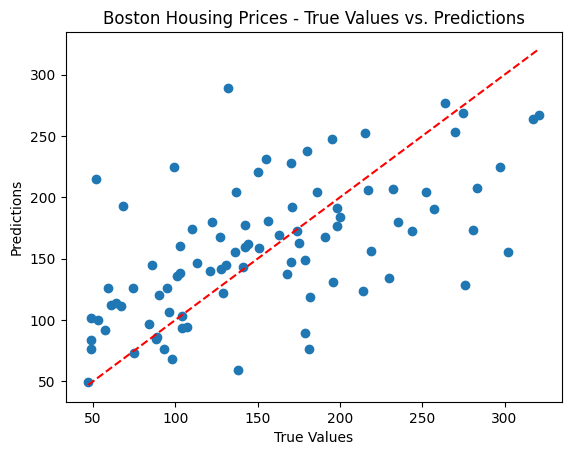

In [8]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # x=y 그래프
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Boston Housing Prices - True Values vs. Predictions')
plt.show()

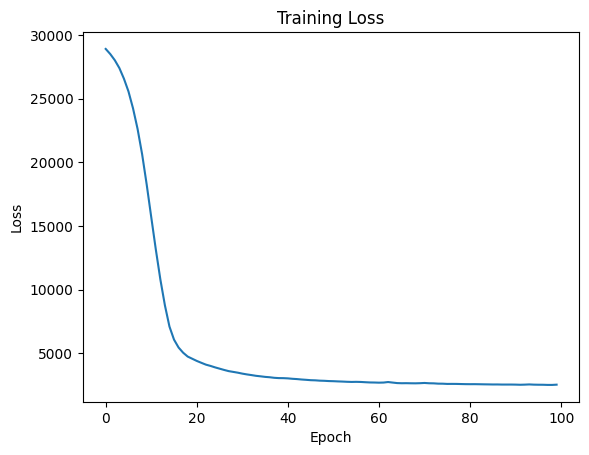

In [9]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [10]:
from sklearn import metrics

# MAE (Mean Absolute Error)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# MAPE (Mean Absolute Percentage Error)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape*100:.2f}%")

# R2 Score (coefficient of determination)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


MAE: 44.99
MAPE: 36.79%
R2 Score: 0.33


## 2. 텐서플로우 주요 레이어의 동작 확인

In [11]:
# 기본 Dense layer
import tensorflow as tf

x = tf.ones((100,10))
y = tf.keras.layers.Dense(20)(x)
print(y[0])
print(y.shape)

tf.Tensor(
[-0.32977563  0.80587983 -0.79963386 -1.0517359  -0.7948185   0.6113416
  1.2425911   0.5006946  -0.76024604  0.877233   -0.39546874  0.3338201
 -0.3187905  -0.6468119  -0.68525505  0.7359647   0.5072092  -0.41532248
  0.04094476  1.0309591 ], shape=(20,), dtype=float32)
(100, 20)


In [12]:
x = tf.ones((100,10))
y = tf.keras.layers.Dense(20, activation='relu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[0.7011312  0.59932065 0.         1.4314146  0.         0.
 1.1980435  0.8329772  0.         1.2531204  0.08027962 0.
 0.38766932 0.71711445 0.         0.63873273 0.         1.2781204
 0.         0.        ], shape=(20,), dtype=float32)
(100, 20)


In [13]:
x = tf.ones((100,3,10))
y = tf.keras.layers.Dense(20, activation='selu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[[ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]
 [ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]
 [ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]], shape=(3, 20), dtype=float32)
(100, 3, 20)


In [14]:
# Convolution layer
x = tf.ones((100, 32, 32, 3)) # N x H x W x D
conv_layer = tf.keras.layers.Conv2D(16, kernel_size=(3, 3))
y = conv_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[[[-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  ...
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]]

 [[-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  ...
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.0994

In [15]:
# LSTM layer
x = tf.ones((100, 10, 32)) #N x SeqLen x Dim
lstm_layer = tf.keras.layers.LSTM(64)
y = lstm_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[-0.23819305 -0.14220291  0.01978228  0.4894313  -0.1504982   0.14128655
  0.33369884 -0.23645318  0.23966585  0.47571298 -0.2959153  -0.08304591
 -0.19552667  0.09816436 -0.388554    0.02173348  0.02695203  0.18810916
 -0.29199836 -0.16043428 -0.3369882   0.43897033  0.05352104 -0.4883921
  0.39062077 -0.05799114  0.41229698  0.09227151  0.00659599 -0.0709353
 -0.14813122 -0.534027    0.25888    -0.23502144 -0.3237153  -0.26964223
  0.08163007 -0.47474518  0.12142213 -0.3016842  -0.12380067  0.09437954
 -0.33966452 -0.30105492  0.19232914 -0.487954    0.3203148  -0.01560181
  0.374239    0.34299344 -0.36753464  0.12051749  0.33895954  0.2652601
  0.16898067 -0.5663703   0.11017505  0.19238934 -0.22675136  0.07201779
  0.05170892  0.11311064  0.44120657 -0.17746007], shape=(64,), dtype=float32)
(100, 64)


In [16]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
# 에러 발생?
y2 = lstm_layer2(y1)
# 출력 확인
print(y1[0])
print(y1.shape)

ValueError: Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (100, 64)

In [17]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64, return_sequences=True)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
y2 = lstm_layer2(y1)
# 출력 확인
print(y1.shape)

(100, 10, 64)


In [19]:
# Dropout 레이어

x = tf.ones((100, 10))
dropout_layer = tf.keras.layers.Dropout(0.5)
y1 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
y2 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
# 출력 확인
# 동일한 dropout layer이지만?
print(y1[0])
print(y2[0])
print(y.shape)

tf.Tensor([0. 0. 0. 0. 2. 2. 0. 0. 0. 2.], shape=(10,), dtype=float32)
tf.Tensor([0. 2. 2. 0. 0. 0. 0. 2. 0. 2.], shape=(10,), dtype=float32)
(100, 64)


In [20]:
y1 = dropout_layer(x, training=False)  # training=True로 설정하여 학습 모드로 설정
y2 = dropout_layer(x, training=False)  # training=True로 설정하여 학습 모드로 설정
print(y1[0])
print(y2[0])


tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)


In [21]:
x = tf.ones((100, 10))
batchnorm_layer = tf.keras.layers.BatchNormalization()
y = batchnorm_layer(x, training=True)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
(100, 10)


## 3. 모델 구성

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(1)) # 분류모델인경우 model.add(Dense(1), activation = 'sigmoid')

# 모델 컴파일
model.compile(optimizer='adam', loss='mse') # 마찬가지로 분류모델의 경우 model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

## 4. 모델 학습 및 다루기

In [23]:
# 모델 트레이닝 관련
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)  # 3 에포크 동안 개선이 없으면 학습 조기 종료
hist = model.fit(X_train, y_train,
          validation_data=(X_train[:10], y_train[:10]),
          epochs = 50,
          callbacks=[early_stopping]) # validation set 필요


Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 28923.1816 - val_loss: 21191.1738
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 28700.2715 - val_loss: 21035.3184
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 28469.2402 - val_loss: 20858.3340
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 28242.7852 - val_loss: 20642.4902
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 27920.9355 - val_loss: 20360.5000
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 27543.3730 - val_loss: 20034.5469
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 26973.5801 - val_loss: 19650.7402
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 26312.8242 - val_loss: 19166.8809
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 25670.3652 - val_loss: 18559.4375
Epoch 10/50
12/12 [==========================

In [24]:
from keras.callbacks import ModelCheckpoint

# 모델 저장 콜백 설정
checkpoint = ModelCheckpoint('./best_model.h5', save_best_only=True, save_weights_only=False)

# 모델 학습 시 콜백 사용
model.fit(X_train, y_train,
        validation_data=(X_train[:10], y_train[:10]),
        epochs = 50,
        callbacks=[checkpoint], verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from keras.models import load_model

best_model = load_model('./best_model.h5')

# 테스트 데이터에 대해 예측 수행
predictions = best_model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


# Keras with Optuna

하이퍼파라미터 최적화 라이브러리인 Optuna를 keras 와 함께 사용할 수 도 있습니다.
마찬가지로 네트워크의 파라미터를 고려한 최적화 함수를 구성하면됩니다.

In [26]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [28]:
import optuna
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

def objective(trial):

    # 모델 정의
    # hyperparameter : num_layer, num_units, actviation function
    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()
    for i in range(num_layers):
        num_units = trial.suggest_categorical('num_units_layer{}'.format(i), [32, 64])
        activation = trial.suggest_categorical('activation_layer{}'.format(i), ['relu', 'tanh'])
        model.add(Dense(units=num_units, activation=activation))
    model.add(Dense(1))

    # 옵티마이저 선택
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    optimizer = RMSprop(learning_rate=lr)

    model.compile(loss='mean_squared_error', optimizer=optimizer)  # 회귀 문제이므로 손실함수로 MSE 사용

    model.fit(X_train, y_train,
              epochs=2,
              batch_size=128)

    # 검증셋에서의 손실을 구합니다.
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    return val_loss

#direction 을 통해 최적화 방향 결정
study = optuna.create_study(direction='minimize')
# trial class를 상속받아 생성한 커스텀 objective 최적화
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-06-21 07:16:18,835] A new study created in memory with name: no-name-2473a363-d946-4514-a0ab-c7b76c3ef4a8


Epoch 1/2


<ipython-input-28-1875bc125575>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)


3/3 [==============================] - 0s 5ms/step - loss: 29011.0703
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29006.8379


[I 2024-06-21 07:16:19,616] Trial 0 finished with value: 28800.296875 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 6.394546534344214e-05}. Best is trial 0 with value: 28800.296875.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29010.9121
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 28380.7148


[I 2024-06-21 07:16:20,338] Trial 1 finished with value: 27823.505859375 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 0.00902904665683861}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29027.0254
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 28890.7168


[I 2024-06-21 07:16:21,163] Trial 2 finished with value: 28611.947265625 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'relu', 'lr': 0.0010516129748356538}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29040.8867
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29038.5273


[I 2024-06-21 07:16:21,980] Trial 3 finished with value: 28831.80859375 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'num_units_layer1': 32, 'activation_layer1': 'relu', 'lr': 3.3230606642663124e-05}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29120.4258
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29104.3223


[I 2024-06-21 07:16:22,656] Trial 4 finished with value: 28904.0234375 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'tanh', 'lr': 0.00031681312909088256}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29166.6113
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29081.0430


[I 2024-06-21 07:16:23,338] Trial 5 finished with value: 28841.044921875 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 0.001427140029035268}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29019.2754
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 29009.7910


[I 2024-06-21 07:16:24,026] Trial 6 finished with value: 28800.33203125 and parameters: {'num_layers': 1, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'lr': 0.0002267686404325888}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29072.9062
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29020.3223


[I 2024-06-21 07:16:24,817] Trial 7 finished with value: 28783.421875 and parameters: {'num_layers': 2, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'num_units_layer1': 32, 'activation_layer1': 'tanh', 'lr': 0.0002735997462970498}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 28964.7168
Epoch 2/2
3/3 [==============================] - 0s 6ms/step - loss: 28826.9629


[I 2024-06-21 07:16:25,842] Trial 8 finished with value: 28576.72265625 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 32, 'activation_layer1': 'tanh', 'lr': 0.000963580299423036}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 9ms/step - loss: 29102.8438
Epoch 2/2
3/3 [==============================] - 0s 9ms/step - loss: 29032.0566


[I 2024-06-21 07:16:27,180] Trial 9 finished with value: 28799.787109375 and parameters: {'num_layers': 1, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'lr': 0.0025694055026972496}. Best is trial 1 with value: 27823.505859375.


Number of finished trials:  10
Best trial:
  Value:  27823.505859375
  Params: 
    num_layers: 1
    num_units_layer0: 64
    activation_layer0: relu
    lr: 0.00902904665683861
